In [1]:
import matplotlib.pyplot as plt
import pandas as pd
data=pd.read_excel("WordleClass.xlsx",sheet_name='ALL')
data

,Unnamed: 0,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,...,Vowel_fre,Consonant_fre,Speech,Same_letter_fre,w1_fre,w2_fre,w3_fre,w4_fre,w5_fre,Class
0,0,2022-01-07,202,slump,80630,1362,1,3,23,39,...,1,4,7,0,0.0555,0.0552,0.0366,0.0322,0.0327,4
1,1,2022-01-08,203,crank,101503,1763,1,5,23,31,...,1,4,7,0,0.0474,0.0751,0.0856,0.0641,0.0084,2
2,2,2022-01-09,204,gorge,91477,1913,1,3,13,27,...,2,3,7,2,0.0230,0.0712,0.0751,0.0230,0.1142,3
3,3,2022-01-10,205,query,107134,2242,1,4,16,30,...,2,3,7,0,0.0023,0.0366,0.1142,0.0751,0.0200,0
4,4,2022-01-11,206,drink,153880,3017,1,9,35,34,...,1,4,12,0,0.0313,0.0751,0.0794,0.0641,0.0084,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,467,2023-04-21,671,kayak,17171,1768,0,2,13,37,...,2,3,7,4,0.0084,0.0856,0.0200,0.0856,0.0084,3
468,468,2023-04-22,672,broke,18527,1840,1,9,24,29,...,2,3,13,0,0.0212,0.0751,0.0712,0.0084,0.1142,2
469,469,2023-04-23,673,unzip,16915,1720,0,2,15,34,...,2,3,3,0,0.0366,0.0641,0.0024,0.0794,0.0327,3
470,470,2023-04-24,674,ditto,18104,1815,0,4,24,41,...,2,3,7,2,0.0313,0.0794,0.0746,0.0746,0.0712,4


<AxesSubplot:title={'center':'RadViz for 21 Features'}>

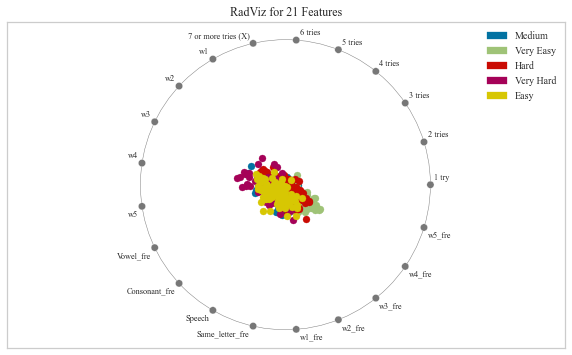

In [2]:
from yellowbrick.features import RadViz
from sklearn.model_selection import train_test_split
classes=['Medium','Very Easy','Hard','Very Hard','Easy']
features=['1 try','2 tries','3 tries','4 tries','5 tries','6 tries','7 or more tries (X)','w1','w2','w3','w4','w5','Vowel_fre','Consonant_fre','Speech','Same_letter_fre','w1_fre','w2_fre','w3_fre','w4_fre','w5_fre']

plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['font.size'] = '16'
plt.figure(figsize=(10,6))
X=data[features]
y=data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20222023)
visualizer = RadViz(classes=classes, features=features)
visualizer.fit(X, y)
visualizer.transform(X)
visualizer.poof(outpath='figures\\RadViz.pdf',bbox_inches="tight")

<AxesSubplot:title={'center':'Shapiro Ranking of 21 Features'}>

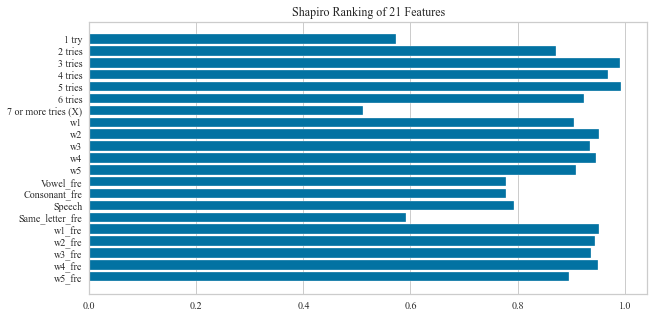

In [3]:
from yellowbrick.features import Rank1D
plt.figure(figsize=(10,5))
visualizer = Rank1D(features=features, algorithm='shapiro')
visualizer.fit(X, y)
visualizer.transform(X)
# plt.tight_layout()
visualizer.poof(outpath="figures\\Rank1D.pdf")

<AxesSubplot:title={'center':'Pearson Ranking of 21 Features'}>

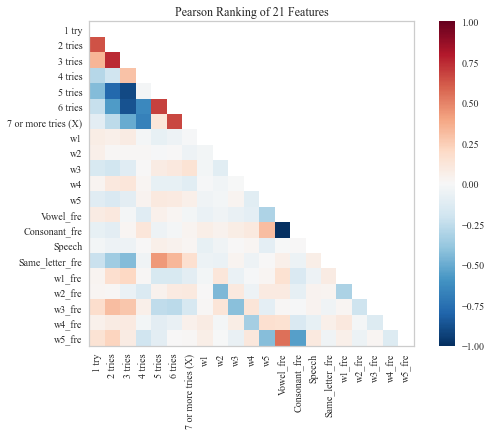

In [4]:
from yellowbrick.features import Rank2D
visualizer = Rank2D(features=features, algorithm='pearson')
plt.figure(figsize=(8,6))
visualizer.fit(X, y)
visualizer.transform(X)
plt.tight_layout()
visualizer.poof(outpath='figures\\Rank2D.pdf')